## **24-2학기 가이드 프로젝트 A조**


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# train/test 데이터 가져오기
train_df = pd.read_csv('/content/drive/MyDrive/DScover/24-2 가이드/train_data_수정.csv')
test_df = pd.read_csv('/content/drive/MyDrive/DScover/24-2 가이드/test_data_수정.csv')
train_df
#25020 rows × 15 columns

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,41,Private,170230,Bachelors,13,Divorced,Exec-managerial,Unmarried,White,Female,0,0,45,United-States,0
1,20,Private,435469,HS-grad,9,Never-married,Other-service,Own-child,White,Female,0,0,40,Mexico,0
2,73,Private,29778,HS-grad,9,Widowed,Other-service,Not-in-family,White,Female,0,0,37,United-States,0
3,56,Self-emp-inc,105582,Some-college,10,Married-civ-spouse,Exec-managerial,Husband,White,Male,7688,0,50,United-States,1
4,53,Private,167065,11th,7,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25015,35,NaN,320084,Bachelors,13,Married-civ-spouse,NaN,Wife,White,Female,0,0,55,United-States,1
25016,30,NaN,33811,Bachelors,13,Never-married,NaN,Not-in-family,Asian-Pac-Islander,Female,0,0,99,United-States,0
25017,71,NaN,287372,Doctorate,16,Married-civ-spouse,NaN,Husband,White,Male,0,0,10,United-States,1
25018,41,NaN,202822,HS-grad,9,Separated,NaN,Not-in-family,Black,Female,0,0,32,United-States,0


##결측치 처리

1. capital gain과 loss 로그 처리
2. race 고려해서 native.country 컬럼의 class 갯수 줄이기
2. 데이터셋 클러스터링을 통한 workclass와 occupation 결측치 imputation

### capital 로그처리

In [ ]:
#수치형 변수의 분포 확인
train_df.describe()

#education.num 교육수준수치?
#capital.gain loss에 이상치!!

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week,income
count,25020.000000,2.502000e+04,25020.000000,25020.000000,25020.000000,25020.000000,25020.000000
mean,38.571783,1.900455e+05,10.069305,1061.663229,88.132494,40.303877,0.237530
std,13.752394,1.056348e+05,2.587560,7280.141527,405.259913,12.479868,0.425578
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000,0.000000
25%,27.000000,1.181030e+05,9.000000,0.000000,0.000000,40.000000,0.000000
50%,37.000000,1.784880e+05,10.000000,0.000000,0.000000,40.000000,0.000000
75%,48.000000,2.368610e+05,12.000000,0.000000,0.000000,45.000000,0.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000,1.000000


capital loss와 gain 처리를 위해 분포 시각화

-> 둘다 이상치 존재

<Axes: >

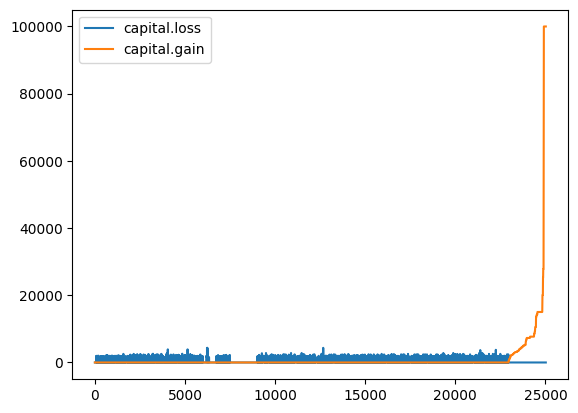

In [ ]:
import matplotlib.pyplot as plt

# train_df라는 데이터프레임에 대해 capital.gain 컬럼을 기준으로 오름차순 정렬
# 가정: train_df는 이미 존재하는 데이터프레임입니다.

# capital.gain 컬럼을 기준으로 데이터프레임 정렬
sorted_df = train_df.sort_values(by='capital.gain', ascending=True)

sorted_df.reset_index(inplace=True)
sorted_df[['capital.loss','capital.gain']].plot()

In [4]:
# 이상치의 영향을 줄이기 위한 로그 변환
import numpy as np

train_df['age'] = train_df['age'].clip(upper=80) #80세를 상한선으로 적용
train_df['fnlwgt'] = np.log1p(train_df['fnlwgt'])  # log 변환 적용
train_df['capital.gain_log'] = np.log1p(train_df['capital.gain'])  # log 변환 적용
train_df['capital.loss_log'] = np.log1p(train_df['capital.loss'])  # log 변환 적용
train_df['hours.per.week'] = train_df['hours.per.week'].clip(upper=60)

train_df=train_df.drop(columns=['capital.gain','capital.loss'])

In [5]:
#test에도 똑같이 처리

test_df['age'] = test_df['age'].clip(upper=80) #80세를 상한선으로 적용
test_df['fnlwgt'] = np.log1p(test_df['fnlwgt'])  # log 변환 적용
test_df['capital.gain_log'] = np.log1p(test_df['capital.gain'])  # log 변환 적용
test_df['capital.loss_log'] = np.log1p(test_df['capital.loss'])  # log 변환 적용
test_df['hours.per.week'] = test_df['hours.per.week'].clip(upper=60)

test_df=test_df.drop(columns=['capital.gain','capital.loss'])

### native country 대푯값 지정

race와 native.country를 기반으로 클러스터링을 하여 class의 갯수를 38개 -> k개로 줄이기

K-means 군집화 알고리즘 활용

데이터의 수가 제일 많은 United-States는 유지하고 대푯값 지정

In [6]:
train_범주형_df=train_df.drop(['age', 'fnlwgt', 'education.num', 'capital.gain_log', 'capital.loss_log', 'hours.per.week','income'],axis = 1)
train_범주형_df['native.country'].value_counts()
#범주형 column:	workclass	education	marital.status	occupation	relationship	race	sex	native.country

#범주형의 education과 수치형의 education.num 사이에 연관성이 있는가?
#native.country에 너무 자잘한 국가들이 많음 -> 대륙이나 race별로 크게 분류? 클러스터링?

,count
native.country,
United-States,22280
Mexico,490
Philippines,158
Germany,104
Canada,97
Puerto-Rico,86
El-Salvador,81
India,75
Cuba,74


In [7]:
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans

# native.country를 라벨 인코딩
le1 = LabelEncoder()
le2 = LabelEncoder()

train_df['race_encoded'] = le1.fit_transform(train_df['race'])
test_df['race_encoded'] = le1.transform(test_df['race'])

train_df['native.country_encoded'] = le2.fit_transform(train_df['native.country'])
test_df['native.country_encoded'] = le2.transform(test_df['native.country'])

In [10]:
#미국이 38로 라벨링 되었음 확인

united_states_label = le2.transform(['United-States'])
united_states_label

array([38])

In [15]:
#미국(38)을 제외한 데이터프레임 countries_df 생성 후 이 df에 대해서 클러스터링 시행
# race와 native.country의 수치형 데이터를 기반으로 클러스터링

countries_df = train_df[train_df['native.country_encoded'] != 38]
united_states_df = train_df[train_df['native.country_encoded'] == 38]

X = countries_df[['race_encoded', 'native.country_encoded']]

kmeans = KMeans(n_clusters=3, random_state=42)

countries_df['native.country_grouped'] = kmeans.fit_predict(X)
countries_df[['race','race_encoded', 'native.country_encoded','native.country_grouped']]

<ipython-input-15-bb5e5a6435c5>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  countries_df['native.country_grouped'] = kmeans.fit_predict(X)


,race,race_encoded,native.country_encoded,native.country_grouped
1,White,4,25,1
14,White,4,3,2
23,White,4,10,2
31,White,4,8,2
39,Asian-Pac-Islander,1,2,2
...,...,...,...,...
25007,White,4,41,0
25008,White,4,41,0
25011,White,4,41,0
25013,White,4,41,0


In [17]:
#United States = 3으로 지정하여 총 4개의 그룹화

countries_df
united_states_df['native.country_grouped']=3

train_df=pd.concat([countries_df,united_states_df],axis=0)
train_df=train_df.sort_index()

<ipython-input-17-e22dde393116>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  united_states_df['native.country_grouped']=3


In [20]:
# 테스트 데이터에도 동일하게 4개로 그룹화

countries_test=test_df[test_df['native.country_encoded'] != 38]
united_states_test=test_df[test_df['native.country_encoded'] == 38]

X_test = countries_test[['race_encoded', 'native.country_encoded']]

# KMeans 모델을 학습하지 않고, 이미 학습한 모델을 사용하여 예측
countries_test['native.country_grouped'] = kmeans.predict(X_test)
united_states_test['native.country_grouped']=3

test_df=pd.concat([countries_test,united_states_test],axis=0)
test_df=test_df.sort_index()

# 결과 확인
test_df[['race', 'native.country_grouped']]

<ipython-input-20-27b522bb9728>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  countries_test['native.country_grouped'] = kmeans.predict(X_test)
<ipython-input-20-27b522bb9728>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  united_states_test['native.country_grouped']=3


,race,native.country_grouped
0,Asian-Pac-Islander,1
1,White,3
2,White,3
3,Asian-Pac-Islander,1
4,White,3
...,...,...
7536,White,3
7537,White,3
7538,White,3
7539,White,3


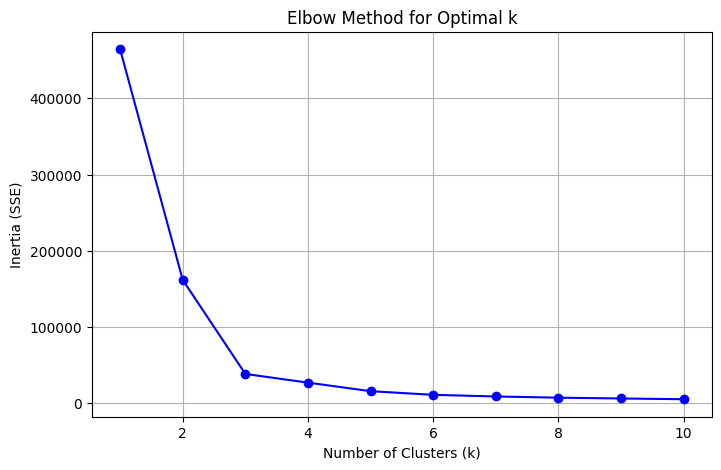

In [12]:
#native.country의 최적의 k개수 찾기위한 엘보우 메소드

from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

#미국(38)을 제외한 데이터프레임 countries_df 생성 후 이 df에 대해서 클러스터링 시행
# race와 native.country의 수치형 데이터를 기반으로 클러스터링

countries_df = train_df[train_df['native.country_encoded'] != 38]
united_states_df = train_df[train_df['native.country_encoded'] == 38]

X = countries_df[['race_encoded', 'native.country_encoded']]

# 엘보우 기법을 위한 k 값 범위 설정 (예: 1~10개의 군집 시도)
sse = []
k_range = range(1, 11)  # k=1부터 k=10까지 시도

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    sse.append(kmeans.inertia_)  # inertia는 SSE와 같은 개념으로 클러스터 내 변동합

# 엘보우 그래프 시각화
plt.figure(figsize=(8, 5))
plt.plot(k_range, sse, marker='o', linestyle='-', color='b')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia (SSE)')
plt.grid(True)
plt.show()


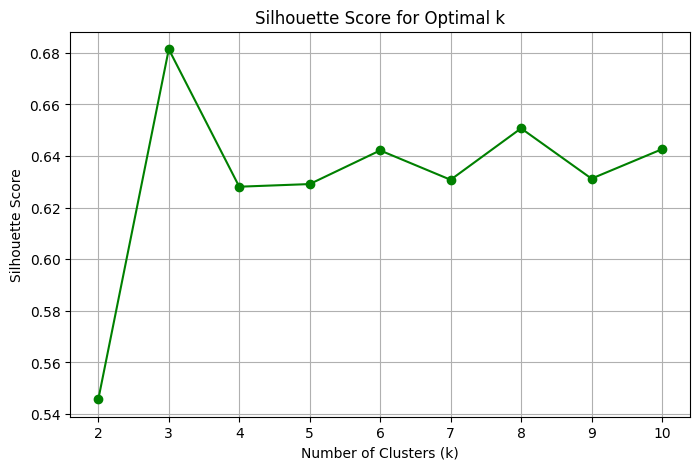

최적의 k 값은 3입니다.


In [13]:
#native.country의 최적의 k개수 찾기위한 실루엣계수

from sklearn.metrics import silhouette_score
# 실루엣 계수 저장 리스트
silhouette_scores = []

# 최적의 k를 찾기 위해 다양한 k값에 대해 실루엣 점수 계산
k_range = range(2, 11)  # k=2부터 k=10까지 시도 (k=1은 실루엣 계산 불가)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    labels = kmeans.labels_
    silhouette_avg = silhouette_score(X, labels)
    silhouette_scores.append(silhouette_avg)

# 실루엣 점수 그래프 시각화
plt.figure(figsize=(8, 5))
plt.plot(k_range, silhouette_scores, marker='o', linestyle='-', color='g')
plt.title('Silhouette Score for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.show()

# 최적의 실루엣 점수를 가진 k 확인
best_k = k_range[silhouette_scores.index(max(silhouette_scores))]
print(f"최적의 k 값은 {best_k}입니다.")

In [23]:
#race와 native.country_grouped만 남기고 지우기

train_df=train_df.drop(columns='native.country_encoded')
train_df=train_df.drop(columns='race_encoded')
train_df=train_df.drop(columns='native.country')

test_df=test_df.drop(columns='native.country_encoded')
test_df=test_df.drop(columns='race_encoded')
test_df=test_df.drop(columns='native.country')

### workclass와 occupation 결측치 채우기

*   결측치가 있는 약 2000개 행 제거한 df구성
*   범주형은 인코딩, 수치형은 정규화 해서 클러스터링


In [24]:
missing_df = train_df[train_df[['workclass', 'occupation']].isnull().any(axis=1)].index

# 결측치가 있는 행을 제외한 새로운 데이터프레임을 생성합니다.
nomissing_df = train_df.drop(missing_df)
#클러스터링을 위한 workclass와 occupation을 제거한 결측치지운df
clustering_df = nomissing_df.drop(columns=['workclass', 'occupation'])

In [25]:
missing_test_df = test_df[test_df[['workclass', 'occupation']].isnull().any(axis=1)].index

# 결측치가 있는 행을 제외한 새로운 데이터프레임을 생성합니다.
nomissing_test_df = test_df.drop(missing_test_df)
#클러스터링을 위한 workclass와 occupation을 제거한 결측치지운df
clustering_test_df = nomissing_test_df.drop(columns=['workclass', 'occupation'])

In [26]:
clustering_df

,age,fnlwgt,education,education.num,marital.status,relationship,race,sex,hours.per.week,income,capital.gain_log,capital.loss_log,native.country_grouped
0,41,12.044912,Bachelors,13,Divorced,Unmarried,White,Female,45,0,0.000000,0.0,3
1,20,12.984181,HS-grad,9,Never-married,Own-child,White,Female,40,0,0.000000,0.0,1
2,73,10.301559,HS-grad,9,Widowed,Not-in-family,White,Female,37,0,0.000000,0.0,3
3,56,11.567253,Some-college,10,Married-civ-spouse,Husband,White,Male,50,1,8.947546,0.0,3
4,53,12.026144,11th,7,Married-civ-spouse,Husband,White,Male,40,0,0.000000,0.0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
25005,45,12.204026,5th-6th,3,Married-civ-spouse,Husband,White,Male,40,0,0.000000,0.0,0
25007,44,11.178250,Masters,14,Married-civ-spouse,Husband,White,Male,50,1,0.000000,0.0,0
25008,58,12.111625,Doctorate,16,Never-married,Not-in-family,White,Female,60,0,0.000000,0.0,0
25011,42,12.290405,HS-grad,9,Divorced,Own-child,White,Male,50,0,0.000000,0.0,0


In [27]:
#클러스터링df에서 수치형은 정규화, 범주형은 인코딩 진행
#age	fnlwgt	education	education.num	marital.status	relationship	race	sex	hours.per.week	income	capital.gain_log	capital.loss_log	native.country_grouped
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
clustering_numdf = scaler.fit_transform(clustering_df[['age', 'fnlwgt', 'education.num', 'capital.gain_log', 'capital.loss_log', 'hours.per.week','income']])
clustering_test_numdf = scaler.transform(clustering_test_df[['age', 'fnlwgt', 'education.num', 'capital.gain_log', 'capital.loss_log', 'hours.per.week','income']])

clustering_numdf = pd.DataFrame(clustering_numdf, columns=['age', 'fnlwgt', 'education.num', 'capital.gain_log', 'capital.loss_log', 'hours.per.week','income'])
clustering_test_numdf = pd.DataFrame(clustering_test_numdf, columns=['age', 'fnlwgt', 'education.num', 'capital.gain_log', 'capital.loss_log', 'hours.per.week','income'])

In [28]:
#클러스터링df에서 수치형은 정규화, 범주형은 인코딩 진행
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

text_cols=['education', 'marital.status', 'relationship', 'race', 'sex', 'native.country_grouped']

clustering_textdf=clustering_df[['education', 'marital.status', 'relationship', 'race', 'sex', 'native.country_grouped']]
clustering_test_textdf=clustering_test_df[['education', 'marital.status', 'relationship', 'race', 'sex', 'native.country_grouped']]

for col in text_cols:
  clustering_textdf[f'{col}_encoded'] = label_encoder.fit_transform(clustering_textdf[col])
  clustering_test_textdf[f'{col}_encoded'] = label_encoder.transform(clustering_test_textdf[col])

clustering_textdf = clustering_textdf.drop(columns=['education', 'marital.status', 'relationship', 'race', 'sex','native.country_grouped'])
clustering_textdf=clustering_textdf.reset_index(drop=True)

clustering_test_textdf = clustering_test_textdf.drop(columns=['education', 'marital.status', 'relationship', 'race', 'sex','native.country_grouped'])
clustering_test_textdf=clustering_test_textdf.reset_index(drop=True)

<ipython-input-28-82164e4566e8>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clustering_textdf[f'{col}_encoded'] = label_encoder.fit_transform(clustering_textdf[col])
<ipython-input-28-82164e4566e8>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clustering_test_textdf[f'{col}_encoded'] = label_encoder.transform(clustering_test_textdf[col])
<ipython-input-28-82164e4566e8>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_ind

In [29]:
clustering_df=pd.concat([clustering_numdf,clustering_textdf],axis=1)
clustering_test_df=pd.concat([clustering_test_numdf,clustering_test_textdf],axis=1)

K-평균(K-Means) 클러스터링을 사용하여 데이터를 군집화합니다. 군집 수는 데이터에 따라 다르지만, 보통 시도해보고 최적 군집 수를 선택합니다.

In [32]:
from sklearn.cluster import KMeans

# 클러스터의 수를 설정합니다.
kmeans = KMeans(n_clusters=10, random_state=42)
nomissing_df['cluster'] = kmeans.fit_predict(clustering_df)
nomissing_test_df['cluster'] = kmeans.predict(clustering_test_df)

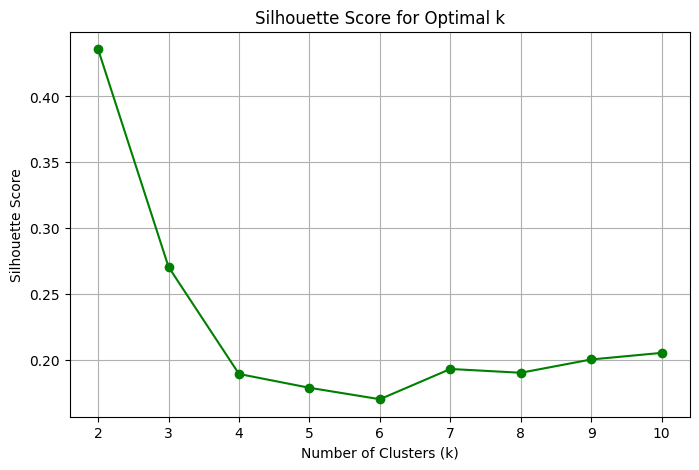

최적의 k 값은 2입니다.


In [31]:
#최적의 k개수 찾기위한 실루엣계수 = 2이지만 10으로 설정

from sklearn.metrics import silhouette_score
# 실루엣 계수 저장 리스트
silhouette_scores = []

# 최적의 k를 찾기 위해 다양한 k값에 대해 실루엣 점수 계산
k_range = range(2, 11)  # k=2부터 k=10까지 시도 (k=1은 실루엣 계산 불가)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(clustering_df)
    labels = kmeans.labels_
    silhouette_avg = silhouette_score(clustering_df, labels)
    silhouette_scores.append(silhouette_avg)

# 실루엣 점수 그래프 시각화
plt.figure(figsize=(8, 5))
plt.plot(k_range, silhouette_scores, marker='o', linestyle='-', color='g')
plt.title('Silhouette Score for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.show()

# 최적의 실루엣 점수를 가진 k 확인
best_k = k_range[silhouette_scores.index(max(silhouette_scores))]
print(f"최적의 k 값은 {best_k}입니다.")

3단계: 결측치 채우기
workclass와 occupation에서 결측치가 있는 행들을 클러스터링 결과에 기반하여 채웁니다.
먼저 각 클러스터에 속하는 값들의 대표적인 workclass와 occupation 값을 확인한 후, 결측치가 있는 행을 해당 클러스터의 대표 값으로 채웁니다.

In [33]:
'''missing_df = train_df[train_df[['workclass', 'occupation']].isnull().any(axis=1)].index

# 결측치가 있는 행을 제외한 새로운 데이터프레임을 생성합니다.
nomissing_df = train_df.drop(missing_df)
#클러스터링을 위한 workclass와 occupation을 제거한 결측치지운df
clustering_df = nomissing_df.drop(columns=['workclass', 'occupation'])
'''
# 결측치가 있는 행들을 다시 가져옵니다.
df_missing = train_df.loc[missing_df].copy()

In [34]:
# 클러스터링을 위해 결측치가 없는 행과 동일한 방식으로 데이터 정규화
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
missing_numdf = scaler.fit_transform(df_missing[['age', 'fnlwgt', 'education.num', 'capital.gain_log', 'capital.loss_log', 'hours.per.week','income']])
missing_numdf = pd.DataFrame(missing_numdf, columns=['age', 'fnlwgt', 'education.num', 'capital.gain_log', 'capital.loss_log', 'hours.per.week','income'])

from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
text_cols=['education', 'marital.status', 'relationship', 'race', 'sex', 'native.country_grouped']
missing_textdf=df_missing[['education', 'marital.status', 'relationship', 'race', 'sex', 'native.country_grouped']]

for col in text_cols:
  missing_textdf[f'{col}_encoded'] = label_encoder.fit_transform(missing_textdf[col])

missing_textdf = missing_textdf.drop(columns=['education', 'marital.status', 'relationship', 'race', 'sex','native.country_grouped'])
missing_textdf=missing_textdf.reset_index(drop=True)

<ipython-input-34-99d52a73b1da>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  missing_textdf[f'{col}_encoded'] = label_encoder.fit_transform(missing_textdf[col])
<ipython-input-34-99d52a73b1da>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  missing_textdf[f'{col}_encoded'] = label_encoder.fit_transform(missing_textdf[col])
<ipython-input-34-99d52a73b1da>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inst

In [35]:
missing_df=pd.concat([missing_numdf,missing_textdf],axis=1)
missing_df

,age,fnlwgt,education.num,capital.gain_log,capital.loss_log,hours.per.week,income,education_encoded,marital.status_encoded,relationship_encoded,race_encoded,sex_encoded,native.country_grouped_encoded
0,1.938239,-1.085720,-0.097380,-0.264994,6.206774,0.608465,-0.340026,11,6,1,4,0,3
1,1.245545,0.255561,0.286927,-0.264994,6.206774,0.608465,-0.340026,15,6,4,2,0,3
2,0.503372,0.137552,2.592771,-0.264994,5.876535,0.608465,2.940955,10,4,1,4,1,3
3,0.998154,-0.229312,-0.097380,-0.264994,5.814447,0.032612,-0.340026,11,2,0,4,1,3
4,1.492936,-0.676689,-0.097380,-0.264994,5.780327,-1.191075,-0.340026,11,2,0,4,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1838,-0.288278,1.080965,1.439849,-0.264994,-0.180043,1.688189,2.940955,9,2,5,4,0,3
1839,-0.535669,-2.338934,1.439849,-0.264994,-0.180043,2.048097,-0.340026,9,4,1,1,0,3
1840,1.492936,0.916943,2.592771,-0.264994,-0.180043,-1.550983,2.940955,10,2,0,4,1,3
1841,0.008591,0.386793,-0.097380,-0.264994,-0.180043,0.032612,-0.340026,11,5,1,2,0,3


In [36]:
# 결측치가 있는 행들을 클러스터에 할당합니다.
df_missing['cluster'] = kmeans.predict(missing_df)

# 각 클러스터에서 가장 빈번한 'workclass'와 'occupation' 값을 찾습니다.
cluster_workclass_mode = nomissing_df.groupby('cluster')['workclass'].agg(lambda x: x.mode()[0])
cluster_occupation_mode = nomissing_df.groupby('cluster')['occupation'].agg(lambda x: x.mode()[0])

# 결측치가 있는 행들을 클러스터 기반으로 채웁니다.
df_missing['workclass'] = df_missing['cluster'].map(cluster_workclass_mode)
df_missing['occupation'] = df_missing['cluster'].map(cluster_occupation_mode)

In [37]:
#workclass와 occupation의 결측치 채워짐
df_missing

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,hours.per.week,income,capital.gain_log,capital.loss_log,native.country_grouped,cluster
22621,80,Private,11.252262,HS-grad,9,Widowed,Other-service,Not-in-family,White,Female,40,0,0.0,8.379539,3,2
22622,66,Private,12.133835,Some-college,10,Widowed,Adm-clerical,Unmarried,Black,Female,40,0,0.0,8.379539,3,3
22624,51,Private,12.056272,Doctorate,16,Never-married,Exec-managerial,Not-in-family,White,Male,40,1,0.0,7.946264,3,8
22626,61,Private,11.815146,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,32,0,0.0,7.864804,3,0
22627,71,Private,11.521102,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,15,0,0.0,7.820038,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25015,35,Private,12.676342,Bachelors,13,Married-civ-spouse,Adm-clerical,Wife,White,Female,55,1,0.0,0.000000,3,5
25016,30,Private,10.428571,Bachelors,13,Never-married,Prof-specialty,Not-in-family,Asian-Pac-Islander,Female,60,0,0.0,0.000000,3,6
25017,71,Private,12.568536,Doctorate,16,Married-civ-spouse,Exec-managerial,Husband,White,Male,10,1,0.0,0.000000,3,8
25018,41,Private,12.220089,HS-grad,9,Separated,Other-service,Not-in-family,Black,Female,32,0,0.0,0.000000,3,2


In [38]:
combined_df = pd.concat([nomissing_df, df_missing], axis=0, ignore_index=True).drop(columns='cluster')
combined_df

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,hours.per.week,income,capital.gain_log,capital.loss_log,native.country_grouped
0,41,Private,12.044912,Bachelors,13,Divorced,Exec-managerial,Unmarried,White,Female,45,0,0.000000,0.0,3
1,20,Private,12.984181,HS-grad,9,Never-married,Other-service,Own-child,White,Female,40,0,0.000000,0.0,1
2,73,Private,10.301559,HS-grad,9,Widowed,Other-service,Not-in-family,White,Female,37,0,0.000000,0.0,3
3,56,Self-emp-inc,11.567253,Some-college,10,Married-civ-spouse,Exec-managerial,Husband,White,Male,50,1,8.947546,0.0,3
4,53,Private,12.026144,11th,7,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,40,0,0.000000,0.0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25015,35,Private,12.676342,Bachelors,13,Married-civ-spouse,Adm-clerical,Wife,White,Female,55,1,0.000000,0.0,3
25016,30,Private,10.428571,Bachelors,13,Never-married,Prof-specialty,Not-in-family,Asian-Pac-Islander,Female,60,0,0.000000,0.0,3
25017,71,Private,12.568536,Doctorate,16,Married-civ-spouse,Exec-managerial,Husband,White,Male,10,1,0.000000,0.0,3
25018,41,Private,12.220089,HS-grad,9,Separated,Other-service,Not-in-family,Black,Female,32,0,0.000000,0.0,3


In [39]:
combined_df.to_csv('final_train_df.csv')

In [40]:
nomissing_test_df.to_csv('final_test_df.csv')

### hours.per.week 컬럼 이상치 처리

In [9]:
import pandas as pd
train_df=pd.read_csv('final_train_df.csv').drop(columns='Unnamed: 0')
test_df =pd.read_csv('final_test_df.csv').drop(columns='Unnamed: 0')

<Axes: >

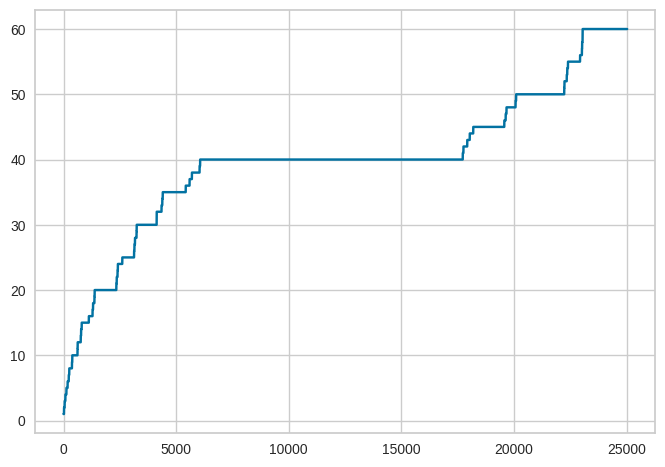

In [10]:
#hours.per.week 분포 및 이상치를 확인하기 위한 시각화

sorted_df = train_df.sort_values(by='hours.per.week', ascending=True)

sorted_df.reset_index(inplace=True)
sorted_df['hours.per.week'].plot()

In [11]:
# 이상치의 영향을 줄이기 위한 로그 변환
import numpy as np

#연장근로 포함 근로 가능 시간	1주 최대 52시간임을 고려하여 상한선 52로 설정
train_df['hours.per.week'] = train_df['hours.per.week'].clip(upper=52)
# log 변환 적용
train_df['hours.per.week_log'] = np.log1p(train_df['hours.per.week'])

train_df=train_df.drop(columns=['hours.per.week'])

In [12]:
#test 데이터도 똑같이 처리
test_df['hours.per.week'] = test_df['hours.per.week'].clip(upper=52)
test_df['hours.per.week_log'] = np.log1p(test_df['hours.per.week'])  # log 변환 적용

test_df=test_df.drop(columns=['hours.per.week'])

In [13]:
train_df.to_csv('train_df.csv')
test_df.to_csv('test_df.csv')

## 전처리 완료한 데이터셋 범주형 인코딩

In [16]:
import pandas as pd
train_df=pd.read_csv('train_df.csv').drop(columns='Unnamed: 0')
test_df =pd.read_csv('test_df.csv').drop(columns='Unnamed: 0')

In [17]:
from sklearn.preprocessing import LabelEncoder
import numpy as np

# train_df에 대해 LabelEncoder 학습 및 변환
le = LabelEncoder()
for col in ['workclass', 'education', 'marital.status', 'occupation', 'relationship', 'race', 'sex']:
    train_df[col + '_encoded'] = le.fit_transform(train_df[col])
    test_df[col + '_encoded'] = le.transform(test_df[col])
'''
# 새로운 범주 처리
for col in ['workclass', 'education', 'marital.status', 'occupation', 'relationship', 'race', 'sex']:
    # LabelEncoder에 새로운 클래스 추가 ('unknown' 처리)
    le.classes_ = np.append(le.classes_, 'unknown')

    # unseen labels 처리: 새로운 범주를 'unknown'으로 변환
    test_df[col] = test_df[col].apply(lambda x: x if x in le.classes_ else 'unknown')

    # LabelEncoder로 변환
    test_df[col + '_encoded'] = le.transform(test_df[col])
'''
# 원본 컬럼 삭제
train_df = train_df.drop(columns=['workclass', 'education', 'marital.status', 'occupation', 'relationship', 'race', 'sex'])
test_df = test_df.drop(columns=['workclass', 'education', 'marital.status', 'occupation', 'relationship', 'race', 'sex'])

## 모델 학습

가이드 코드에서는 LogisticRegression을 예시로 보여드립니다! 다양한 모델 및 분석방법을 통해 정확도를 높여주세요!

In [18]:
X = train_df.drop(['income'], axis=1)
y = train_df['income']
print(X.shape, y.shape)

(25020, 14) (25020,)


In [19]:
X_test = test_df.drop(['income'], axis=1)
y_test = test_df['income']

In [5]:
!pip install pycaret

In [20]:
# 필요한 라이브러리 불러오기
import pandas as pd
from pycaret.classification import *

# PyCaret 설정: 이진 분류 문제로 setup
# 'target'이 목표 변수로 설정
clf_setup = setup(data=train_df,
                  target='income',     # 타겟 변수 이름
                  train_size=0.8,      # 학습 데이터 비율
                  session_id=123)      # 재현 가능성을 위한 랜덤 시드

# 여러 모델을 비교
best_model = compare_models()

# 베스트 모델 출력
print(best_model)

# 베스트 모델을 사용하여 학습
final_model = finalize_model(best_model)

# 모델 성능 평가
evaluate_model(final_model)

# 테스트 데이터 예측
# test.csv 파일을 사용한다고 가정
predictions = predict_model(final_model, data=test_df)

# 결과 확인
#print(predictions)

,Description,Value
0,Session id,123
1,Target,income
2,Target type,Binary
3,Original data shape,"(25020, 15)"
4,Transformed data shape,"(25020, 15)"
5,Transformed train set shape,"(20016, 15)"
6,Transformed test set shape,"(5004, 15)"
7,Numeric features,14
8,Preprocess,True
9,Imputation type,simple


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.8712,0.9257,0.6439,0.7761,0.7035,0.6221,0.6268,1.3170
xgboost,Extreme Gradient Boosting,0.8669,0.9226,0.6502,0.7564,0.6988,0.6141,0.6173,0.2590
gbc,Gradient Boosting Classifier,0.8663,0.9204,0.5949,0.7907,0.6786,0.5963,0.6062,2.4840
ada,Ada Boost Classifier,0.8601,0.9139,0.5924,0.7661,0.6678,0.5811,0.5890,0.6800
rf,Random Forest Classifier,0.8564,0.9060,0.6168,0.7362,0.6708,0.5799,0.5839,2.1900
et,Extra Trees Classifier,0.8444,0.8896,0.6104,0.6972,0.6506,0.5511,0.5533,1.8890
lr,Logistic Regression,0.8225,0.8485,0.4508,0.6948,0.5465,0.4424,0.4585,1.1760
knn,K Neighbors Classifier,0.8184,0.8426,0.5955,0.6234,0.6088,0.4907,0.4911,0.3400
lda,Linear Discriminant Analysis,0.8145,0.8419,0.4283,0.6720,0.5230,0.4149,0.4312,0.0600
ridge,Ridge Classifier,0.8137,0.8419,0.3586,0.7152,0.4776,0.3792,0.4127,0.0520


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=123, reg_alpha=0.0, reg_lambda=0.0, subsample=1.0,
               subsample_for_bin=200000, subsample_freq=0)


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Light Gradient Boosting Machine,0.8726,0.9255,0.6702,0.7915,0.7258,0.6436,0.6473


      age     fnlwgt  education.num  capital.gain_log  capital.loss_log  \
0      45  12.240995             12               0.0          7.640604   
1      22  12.192926              9               0.0          0.000000   
2      39  11.619706             13               0.0          0.000000   
3      35  11.495617             15               0.0          0.000000   
4      40  12.320441             13               0.0          0.000000   
...   ...        ...            ...               ...               ...   
7536   20  12.818153             10               0.0          0.000000   
7537   52  12.008451              9               0.0          0.000000   
7538   50  12.330491             10               0.0          0.000000   
7539   26  12.578374             10               0.0          0.000000   
7540   29  12.171238              9               0.0          7.250636   

      native.country_grouped  cluster  hours.per.week_log  workclass_encoded  \
0                  

In [21]:
# 테스트 데이터에서 예측 수행
predictions = predict_model(final_model, data=test_df)

# 정확도 계산 (예측된 값과 실제 값 비교)
from sklearn.metrics import accuracy_score

# 'Label' 열이 예측된 값, 'income'이 실제 값
accuracy = accuracy_score(test_df['income'], predictions['income'])

# 정확도 출력
print(f"Test Data Accuracy: {accuracy * 100:.2f}%")


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Light Gradient Boosting Machine,0.8726,0.9255,0.6702,0.7915,0.7258,0.6436,0.6473


Test Data Accuracy: 100.00%


In [8]:
# 필요한 라이브러리 불러오기
import pandas as pd
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from pycaret.classification import *

# 타겟 변수 분리
X = train_df.drop(['income'], axis=1)
y = train_df['income']
print(X.shape, y.shape)
    
# SMOTE 적용
smote = SMOTE(random_state=123)
X_train_smote, y_train_smote = smote.fit_resample(X, y)

# SMOTE 적용 후 PyCaret 설정
train_data_smote = pd.concat([X_train_smote, y_train_smote], axis=1)

# PyCaret 설정
clf_setup = setup(data=train_data_smote,
                  target='income',     # 타겟 변수 이름
                  train_size=0.8,      # 학습 데이터 비율
                  session_id=123)      # 재현 가능성을 위한 랜덤 시드

# 여러 모델을 비교
best_model = compare_models()

# 베스트 모델 출력
print(best_model)

# 베스트 모델을 사용하여 학습
final_model = finalize_model(best_model)

# 모델 성능 평가
evaluate_model(final_model)

# 테스트 데이터 예측 (test_df 사용)
predictions = predict_model(final_model, data=test_df)

# 결과 확인
print(predictions)

(25020, 14) (25020,)


,Description,Value
0,Session id,123
1,Target,income
2,Target type,Binary
3,Original data shape,"(38154, 15)"
4,Transformed data shape,"(38154, 15)"
5,Transformed train set shape,"(30523, 15)"
6,Transformed test set shape,"(7631, 15)"
7,Numeric features,14
8,Preprocess,True
9,Imputation type,simple


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.8885,0.9553,0.9094,0.8729,0.8908,0.7770,0.7777,3.5800
rf,Random Forest Classifier,0.8883,0.9559,0.9086,0.8732,0.8905,0.7766,0.7773,3.8760
xgboost,Extreme Gradient Boosting,0.8770,0.9518,0.8988,0.8614,0.8796,0.7540,0.7548,0.4130
lightgbm,Light Gradient Boosting Machine,0.8722,0.9483,0.8927,0.8576,0.8748,0.7444,0.7451,1.3620
gbc,Gradient Boosting Classifier,0.8533,0.9350,0.8792,0.8359,0.8570,0.7065,0.7075,3.6020
ada,Ada Boost Classifier,0.8453,0.9274,0.8730,0.8273,0.8495,0.6905,0.6917,1.0580
dt,Decision Tree Classifier,0.8412,0.8412,0.8503,0.8350,0.8426,0.6823,0.6825,0.2130
knn,K Neighbors Classifier,0.8328,0.9038,0.9300,0.7788,0.8476,0.6656,0.6786,0.9370
qda,Quadratic Discriminant Analysis,0.7887,0.8673,0.7985,0.7832,0.7908,0.5774,0.5775,0.1060
nb,Naive Bayes,0.7852,0.8621,0.7960,0.7794,0.7876,0.5705,0.5707,0.1180


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='sqrt',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_samples_leaf=1,
                     min_samples_split=2, min_weight_fraction_leaf=0.0,
                     monotonic_cst=None, n_estimators=100, n_jobs=-1,
                     oob_score=False, random_state=123, verbose=0,
                     warm_start=False)


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Extra Trees Classifier,0.8312,0.8834,0.7107,0.6507,0.6794,0.5652,0.5662


      age     fnlwgt  education.num  hours.per.week  capital.gain_log  \
0      45  12.240995             12              40               0.0   
1      22  12.192926              9              40               0.0   
2      39  11.619706             13              40               0.0   
3      35  11.495617             15              40               0.0   
4      40  12.320441             13              40               0.0   
...   ...        ...            ...             ...               ...   
7536   20  12.818153             10              20               0.0   
7537   52  12.008451              9              50               0.0   
7538   50  12.330491             10              45               0.0   
7539   26  12.578374             10              40               0.0   
7540   29  12.171238              9              40               0.0   

      capital.loss_log  native.country_grouped  cluster  workclass_encoded  \
0             7.640604                       

In [ ]:
#SMOTE 한 후 target label에 따른 데이터 개수 확인하기
print(train_data_smote.shape)
print(y_train_smote.value_counts())

(38154, 15)
income
0    19077
1    19077
Name: count, dtype: int64
